<a href="https://colab.research.google.com/github/bachpro900/projet_Data_fraud/blob/main/fraud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
import collections, numpy # collections.Counter(X) sert à compter les occurrences dans X de type numpy array
import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:

df= pd.read_csv("https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/total/fraud.csv", index_col="user_id")
df_copie = df.copy()
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
user_id,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
#afficher les dimensions du df
df.shape 

(151112, 10)

In [ ]:
#checker si il y'a des cellules vide
print(df.isnull().sum())
print("\nil n'y a pas de valeurs manquantes")

signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
is_fraud          0
dtype: int64

il n'y a pas de valeurs manquantes


In [ ]:
#vérifier si il n'y a pas des id doublons
print(any(df.index.duplicated()))
print(len(df.index.unique())==df.shape[0])


False
True


In [ ]:
#afficher le type des variables
print(df.dtypes)

signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
is_fraud            int64
dtype: object


In [ ]:
################################### spliter en deux les colonnes temporelles###################################################
###############################################################################################################################
'''
#spliter signup_time en une date, et une heure de connexion
df["signup_day"] = df['signup_time'].apply(lambda x: x.split(' ')[0])
df["signup_hour"] = df['signup_time'].apply(lambda x: x.split(' ')[1])

#spliter signup_time en une date, et une heure d'achat
df["purchase_day"] = df['purchase_time'].apply(lambda x: x.split(' ')[0])
df["purchase_hour"] = df['purchase_time'].apply(lambda x: x.split(' ')[1])
'''
###############################################################################################################################
###############################################################################################################################

#transformer les deux premières colonnes en des variables temporelles
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

#ajouter une nouvelle colonne qui représente la durée entre la connexion et l'achat
df['lead_time'] = pd.to_datetime(df['purchase_time']) - pd.to_datetime(df['signup_time'])

#convertir lead_time en seconds
df['lead_time']=df['lead_time'].astype('timedelta64[s]')


df.head()



,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,lead_time
user_id,,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4506682.0
333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,17944.0
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1.0
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,492085.0
221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,4361461.0


In [ ]:
print(df.dtypes)

signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
is_fraud                   int64
lead_time                float64
dtype: object


In [ ]:
df.describe()

,purchase_value,age,ip_address,is_fraud,lead_time
count,151112.000000,151112.000000,1.511120e+05,151112.000000,1.511120e+05
mean,36.935372,33.140704,2.152145e+09,0.093646,4.932029e+06
std,18.322762,8.617733,1.248497e+09,0.291336,3.126263e+06
min,9.000000,18.000000,5.209350e+04,0.000000,1.000000e+00
25%,22.000000,27.000000,1.085934e+09,0.000000,2.186754e+06
50%,35.000000,33.000000,2.154770e+09,0.000000,4.926346e+06
75%,49.000000,39.000000,3.243258e+09,0.000000,7.644524e+06
max,154.000000,76.000000,4.294850e+09,1.000000,1.036797e+07


In [ ]:

#replacer F par 1 et M par 0
df["sex"].replace({'F': 1, 'M': 0}, inplace=True)
#df['browser'].replace({'Chrome':0, 'Opera':1, 'Safari':2, 'IE':3 , 'FireFox':4})
df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,lead_time
user_id,,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,0,39,7.327584e+08,0,4506682.0
333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,1,53,3.503114e+08,0,17944.0
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,0,53,2.621474e+09,1,1.0
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,0,41,3.840542e+09,0,492085.0
221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,0,45,4.155831e+08,0,4361461.0


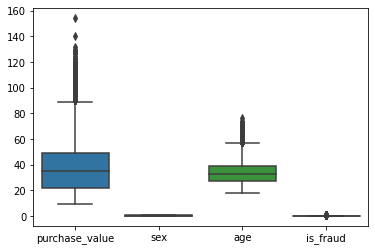

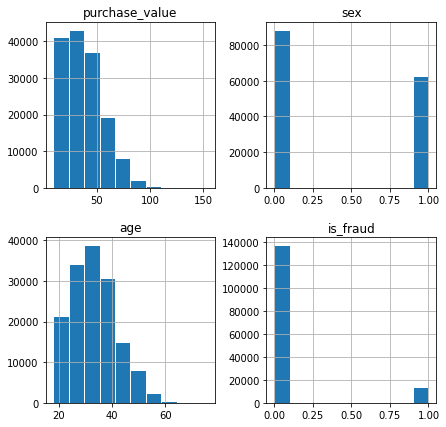

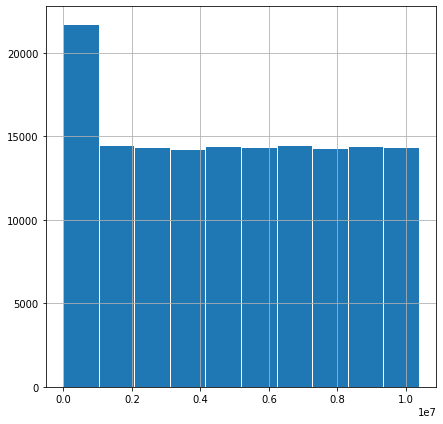

In [ ]:
#visiualiser la distribution des variables du dataframe

sns.boxplot(data=df.select_dtypes('int64'))
plt.show()

df.select_dtypes('int64').hist(figsize=(7,7), ec='w')
plt.show()

df["lead_time"].hist(figsize=(7,7), ec='w')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


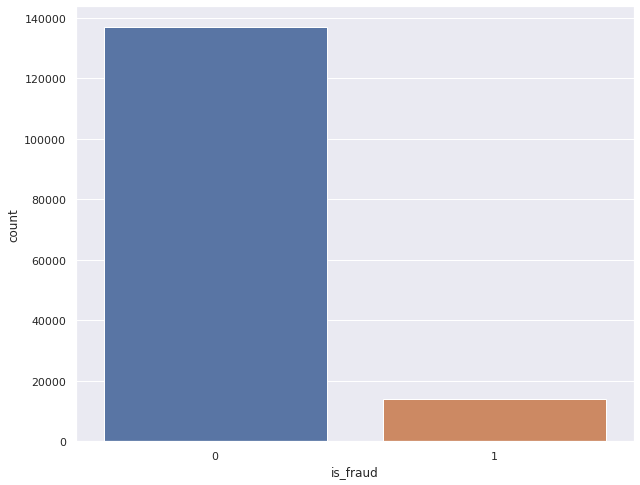

In [ ]:
#viz de is_fraud
sns.countplot(df['is_fraud']);


In [ ]:
#répartition des deux classes
print("\nRépartition des classes : \n",df["is_fraud"].value_counts())
print("\nil n y a que",df["is_fraud"].value_counts()[1]/df["is_fraud"].value_counts()[0],"% de fraudeurs dans le dataframe initial")
print("\nil semble qu'il y a un déséquilibre des classes. C'est ce que va découvrir")



Répartition des classes : 
 0    136961
1     14151
Name: is_fraud, dtype: int64

il n y a que 0.10332138345952498 % de fraudeurs dans le dataframe initial

il semble qu'il y a un déséquilibre des classes. C'est ce que va découvrir


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


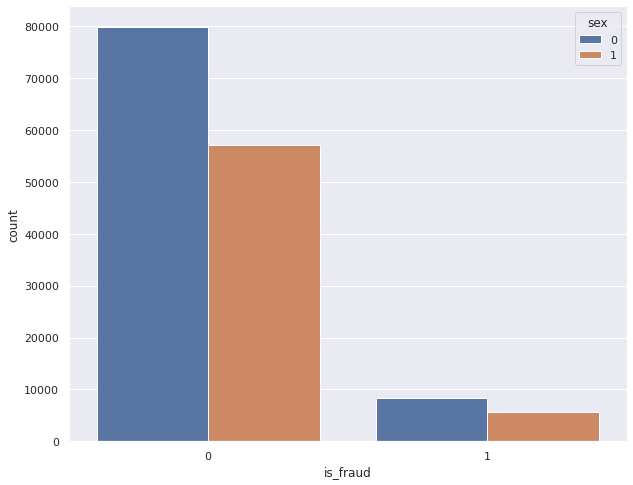

In [ ]:
#distribution de la target en fonction du sex
sns.set_theme
sns.countplot(df['is_fraud'] , hue=df["sex"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


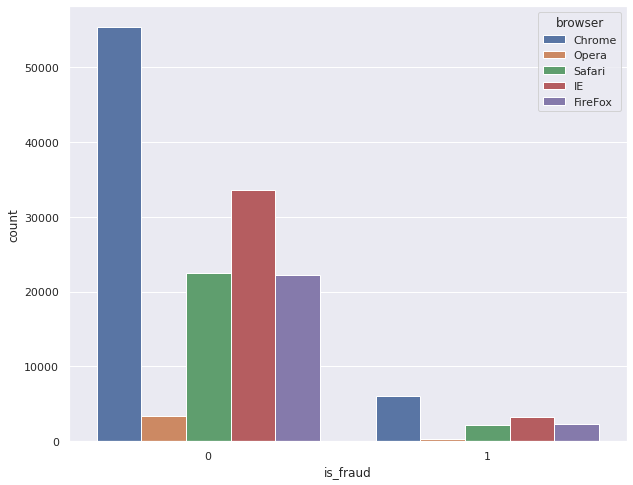

In [ ]:
#distribution de la target en fonction du moteur de recherche
sns.countplot(df['is_fraud'] , hue=df["browser"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


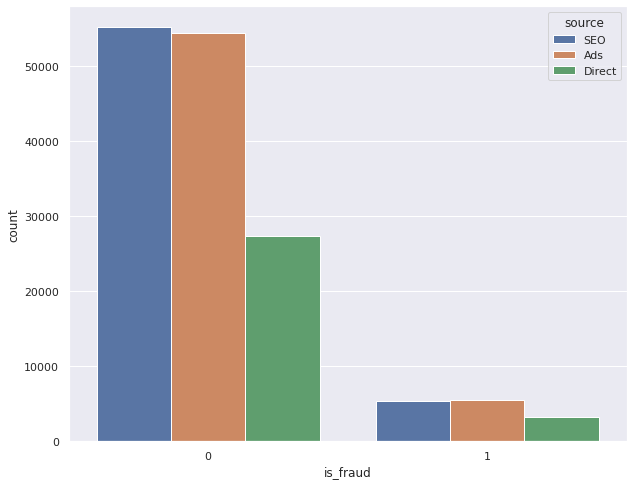

In [ ]:
#distribution de la target en fonction de la source

sns.countplot(df['is_fraud'] , hue=df["source"]);


In [ ]:
#filtrer sur les transactions fraduleuses avec un lead_time = 1 ns
transactions_fraduleuses=df["lead_time"][df["is_fraud"] == 1]


nb_lead_time_1ns = np.count_nonzero(transactions_fraduleuses == 1)

print("sur", transactions_fraduleuses.size, "transactions fraduleuses, il y en a", nb_lead_time_1ns,"qui se sont passées en une 1 ns !!" )

sur 14151 transactions fraduleuses, il y en a 7600 qui se sont passées en une 1 ns !!


''

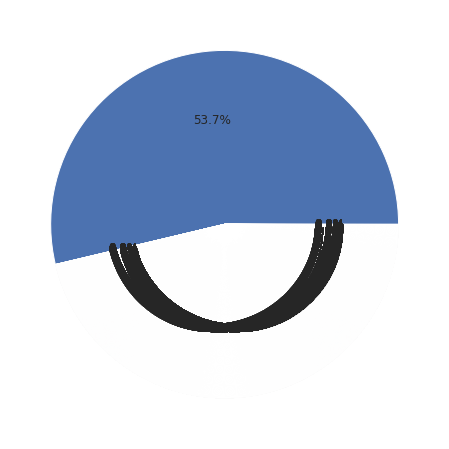

In [ ]:
df_fraud_uniquement = df[df["is_fraud"] == 1]
nb_fraud_en_1ns=df_fraud_uniquement["lead_time"].value_counts()
sns.set(rc={'figure.figsize':(10,8)})
plt.pie(nb_fraud_en_1ns, autopct='%1.1f%%')
;

In [ ]:
#spliter les variables catégorièlles 
dummy_variables = pd.get_dummies(data=df[['source', 'browser']], drop_first=False)



In [ ]:
#construire un df qu'avec les variables pertinentes
df_redifined =pd.concat([df[['purchase_value', 'sex', 'age', 'lead_time', "is_fraud"]], dummy_variables], axis=1)
df_redifined.head()

,purchase_value,sex,age,lead_time,is_fraud,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,,,,,,,
22058,34,0,39,4506682.0,0,0,0,1,1,0,0,0,0
333320,16,1,53,17944.0,0,1,0,0,1,0,0,0,0
1359,15,0,53,1.0,1,0,0,1,0,0,0,1,0
150084,44,0,41,492085.0,0,0,0,1,0,0,0,0,1
221365,39,0,45,4361461.0,0,1,0,0,0,0,0,0,1


In [ ]:
#normaliser les données

def normalisation(DF):
  return (DF - DF.min()) / ( DF.max() - DF.min())
  
df_normalized = normalisation(df_redifined)
df_normalized.head()



,purchase_value,sex,age,lead_time,is_fraud,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,,,,,,,
22058,0.172414,0.0,0.362069,0.434673,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
333320,0.048276,1.0,0.603448,0.001731,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1359,0.041379,0.0,0.603448,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
150084,0.241379,0.0,0.396552,0.047462,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
221365,0.206897,0.0,0.465517,0.420667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#séprarer les données expliquatives et target

X = df_redifined.drop("is_fraud", axis=1)
y = df_redifined["is_fraud"]


In [ ]:
X.head()

,purchase_value,sex,age,lead_time,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,,,,,,
22058,34,0,39,4506682.0,0,0,1,1,0,0,0,0
333320,16,1,53,17944.0,1,0,0,1,0,0,0,0
1359,15,0,53,1.0,0,0,1,0,0,0,1,0
150084,44,0,41,492085.0,0,0,1,0,0,0,0,1
221365,39,0,45,4361461.0,1,0,0,0,0,0,0,1


In [ ]:
y.head()
#collections.Counter(y)

user_id
22058     0
333320    0
1359      1
150084    0
221365    0
Name: is_fraud, dtype: int64

In [ ]:
#séparer les données train et test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42,stratify=y)

#entrainer le modeèle
model_log=KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train) #"#####################################################################################"#

#calculer la target prédite
y_pred=model_log.predict(X_test)

print("Occurence de 0 et 1 dans y_train:",collections.Counter(y_train))
print("Occurence de 0 et 1 dans y_test:",collections.Counter(y_test))
print("Occurence de 0 et 1 prédit par le modèle (y_pred):",collections.Counter(y_pred))

print(X_test.shape[0]+X_train.shape[0])
print(y_test.shape[0]+y_train.shape[0])

Occurence de 0 et 1 dans y_train: Counter({0: 95872, 1: 9906})
Occurence de 0 et 1 dans y_test: Counter({0: 41089, 1: 4245})
Occurence de 0 et 1 prédit par le modèle (y_pred): Counter({0: 43045, 1: 2289})
151112
151112


In [ ]:
print(y_test.shape)
print (X_train.shape)

(45334,)
(105778, 12)


In [ ]:
#calculer l'accuracy
print("l'accuracy est de: ",accuracy_score(y_test, y_pred))

#calculer la balanced accuracy
print("\nComme la Balanced accuracy est de:",balanced_accuracy_score(y_test,y_pred),"alors il y a effectivment déséquilibre des classes.")
print("L'accuracy n'a pas suffit à se prononcer sur la performance du modèle malgré qu'elle est elevée")


#matrice de confusion
print("\n Matrice de confusion:", confusion_matrix(y_test,y_pred))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


#rapport de classification et focus sur le f1_score

print(classification_report(y_test, y_pred))

l'accuracy est de:  0.9557065337274452

Comme la Balanced accuracy est de: 0.7662324946557304 alors il y a effectivment déséquilibre des classes.
L'accuracy n'a pas suffit à se prononcer sur la performance du modèle malgré qu'elle est elevée

 Matrice de confusion: [[41063    26]
 [ 1982  2263]]

 Vrais négatifs: 41063 
 Faux positifs: 26 
 Faux négatifs: 1982 
 Vrais positifs: 2263
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.99      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.97      0.77      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [ ]:
#calculer les odd et identifier les variables les plus significatives

odd_ratio = np.exp(model_log.coef_)
X_odd = pd.DataFrame(X.columns, columns=["variables"])

X_odd["odd_ratio"] = odd_ratio.tolist()[0]
X_odd


AttributeError: ignored

# **Rééquilibrage des classe avec RandomOverSampler**

---



In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)
print('occurance 0 et 1 dans y_train_balanced:',collections.Counter(y_train_balanced))
print("\ncompraratif entre y_train(avant oversampling) VS y_train_balanced (après oversampling):\n",collections.Counter(y_train), collections.Counter(y_train_balanced))


occurance 0 et 1 dans y_train_balanced: Counter({0: 95872, 1: 95872})

compraratif entre y_train(avant oversampling) VS y_train_balanced (après oversampling):
 Counter({0: 95872, 1: 9906}) Counter({0: 95872, 1: 95872})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#entrainter le modèle avec les classes rééquilibrées

#entrainer le modeèle après rééquilbrage des classes
model_log_balanced=KNeighborsClassifier(n_neighbors=5).fit(X_train_balanced,y_train_balanced) ################################################################################""

#calculer la target prédite après rééquilbrage des classes
y_pred_balanced=model_log_balanced.predict(X_test)

print(collections.Counter(y_test))
print("\noccurences des 0 et 1 du y_predit_balanced après rééquilibrage :",collections.Counter(y_pred_balanced))


Counter({0: 41089, 1: 4245})

occurences des 0 et 1 du y_predit_balanced après rééquilibrage : Counter({0: 37400, 1: 7934})


In [ ]:
#calculer l'accuracy
print("l'accuracy est de: ",accuracy_score(y_test, y_pred_balanced))

#calculer la balanced accuracy
print("\nla Balanced accuracy est de:",balanced_accuracy_score(y_test,y_pred_balanced))


#matrice de confusion
print("\n Matrice de confusion:", confusion_matrix(y_test,y_pred_balanced))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_balanced).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


#rapport de classification et focus sur le f1_score

print(classification_report(y_test, y_pred_balanced))

l'accuracy est de:  0.842789076631226

la Balanced accuracy est de: 0.7317181345638835

 Matrice de confusion: [[35681  5408]
 [ 1719  2526]]

 Vrais négatifs: 35681 
 Faux positifs: 5408 
 Faux négatifs: 1719 
 Vrais positifs: 2526
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     41089
           1       0.32      0.60      0.41      4245

    accuracy                           0.84     45334
   macro avg       0.64      0.73      0.66     45334
weighted avg       0.89      0.84      0.86     45334



In [ ]:
#calculer les odd et identifier les variables les plus significatives après le rééquilibrage

odd_ratio_balanced = np.exp(model_log_balanced.coef_)
X_odd_balanced = pd.DataFrame(X.columns, columns=["variables"])

X_odd_balanced["odd_ratio"] = odd_ratio_balanced.tolist()[0]
X_odd_balanced

AttributeError: ignored

# **Rééquilibrage des classes avec SMOTE**




In [ ]:
#rééquilibrage des classes avec SMOTE
sm = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('occurence 0 et 1 dans le y_train_smote après oversampling:',collections.Counter(y_train_smote))
print("\ncompraratif entre y_train(avant oversampling) VS y_train_smote (après oversampling):\n",collections.Counter(y_train), collections.Counter(y_train_smote))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


occurence 0 et 1 dans le y_train_smote après oversampling: Counter({0: 95872, 1: 95872})

compraratif entre y_train(avant oversampling) VS y_train_smote (après oversampling):
 Counter({0: 95872, 1: 9906}) Counter({0: 95872, 1: 95872})


In [ ]:

#entrainter le modèle avec les classes rééquilibrées

#entrainer le modeèle après rééquilbrage des classes
model_log_smote=KNeighborsClassifier(n_neighbors=5).fit(X_train_smote,y_train_smote)

#calculer la target prédite après rééquilbrage des classes
y_pred_smote=model_log_smote.predict(X_test)

print(collections.Counter(y_test))
print("\noccurences des 0 et 1 du y prédit après rééquilibrage :",collections.Counter(y_pred_smote))


Counter({0: 41089, 1: 4245})

occurences des 0 et 1 du y prédit après rééquilibrage : Counter({0: 35273, 1: 10061})


In [ ]:
#calculer l'accuracy avec smote
print("l'accuracy est de: ",accuracy_score(y_test, y_pred_smote))

#calculer la balanced accuracy
print("\nla Balanced accuracy est de:",balanced_accuracy_score(y_test,y_pred_smote))


#matrice de confusion
print("\n Matrice de confusion:", confusion_matrix(y_test,y_pred_smote))

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_smote).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


#rapport de classification et focus sur le f1_score

print(classification_report(y_test, y_pred_smote))

l'accuracy est de:  0.8010323377597388

la Balanced accuracy est de: 0.7210399523158684

 Matrice de confusion: [[33671  7418]
 [ 1602  2643]]

 Vrais négatifs: 33671 
 Faux positifs: 7418 
 Faux négatifs: 1602 
 Vrais positifs: 2643
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     41089
           1       0.26      0.62      0.37      4245

    accuracy                           0.80     45334
   macro avg       0.61      0.72      0.63     45334
weighted avg       0.89      0.80      0.83     45334



# **Rééquilibrage des classes sur l'ensemble du dataframe**

In [ ]:

oversampled_model = RandomOverSampler(sampling_strategy='minority')
XX_balanced,yy_balanced = oversampled_model.fit_resample(X, y)
XX_train_balanced, XX_test_balanced, yy_train_balanced, yy_test_balanced = train_test_split(XX_balanced, yy_balanced, test_size=0.30, random_state=42, stratify=yy_balanced)


print(collections.Counter(y_train), collections.Counter(yy_train_balanced))

print((yy_test_balanced.shape[0]+yy_train_balanced.shape[0])- df.shape[0], "lignes ont été rajoutées après l'oversampling. Le nombre initial de ligne est de 151112 !!") 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95872, 1: 9906}) Counter({1: 95873, 0: 95872})
122810 lignes ont été rajoutées après l'oversampling. Le nombre initial de ligne est de 151112 !!


In [ ]:
#entrainter le modèle avec les classes rééquilibrées

#entrainer le modeèle après rééquilbrage des classes
model=KNeighborsClassifier(n_neighbors=5).fit(XX_train_balanced,yy_train_balanced)

#calculer la target prédite après rééquilbrage des classes
yy_pred_balanced=model.predict(XX_test_balanced)

print(collections.Counter(y_test))
print("\noccurences des 0 et 1 du y prédit après rééquilibrage :",collections.Counter(yy_pred_balanced))


Counter({0: 41089, 1: 4245})

occurences des 0 et 1 du y prédit après rééquilibrage : Counter({1: 48002, 0: 34175})


In [ ]:
#calculer l'accuracy
print("l'accuracy est de: ",accuracy_score(yy_test_balanced, yy_pred_balanced))

#calculer la balanced accuracy
print("\nla Balanced accuracy est de:",balanced_accuracy_score(yy_test_balanced,yy_pred_balanced))


#matrice de confusion
print("\n Matrice de confusion:", confusion_matrix(yy_test_balanced,yy_pred_balanced))

tn, fp, fn, tp = confusion_matrix(yy_test_balanced,yy_pred_balanced).ravel()
print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


#rapport de classification et focus sur le f1_score

print(classification_report(yy_test_balanced, yy_pred_balanced))

l'accuracy est de:  0.9045718388356839

la Balanced accuracy est de: 0.9045728626538138

 Matrice de confusion: [[33711  7378]
 [  464 40624]]

 Vrais négatifs: 33711 
 Faux positifs: 7378 
 Faux négatifs: 464 
 Vrais positifs: 40624
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     41089
           1       0.85      0.99      0.91     41088

    accuracy                           0.90     82177
   macro avg       0.92      0.90      0.90     82177
weighted avg       0.92      0.90      0.90     82177



In [ ]:
###################### predir une transaction ################
#############################################################
#X.head()

transaction = [[170,1,29,200,0,0,1,1,0,0,0,0]]
print(model.predict(transaction))


[1]


In [ ]:
pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=6008 sha256=3e365a33cf3f4f8abd70453893f0b6c620ea666863f010c1a72d76a972598c83
  Stored in directory: /root/.cache/pip/wheels/d0/70/0b/673e09a7ed429660d22352a1b117b4f616a8fc054bdd7eb157
Successfully built pickle-mixin


In [ ]:
#construire un modèle avec pickle
import pickle
pickle_out = open("fraud_model.pkl", "wb")
pickle.dump (model, pickle_out)
pickle_out.close()


In [ ]:
#
!pip install lightgbm
!pip install catboost

/bin/bash: -c: line 0: syntax error near unexpected token `install'
/bin/bash: -c: line 0: `pip (install lightgbm)'
     |████████████████████████████████| 76.3 MB 34 kB/s 


In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def ensemble_model(X_train,X_test, Y_train, Y_test):
  class_weight={0:0.087, 1:1}
  MLA = [CatBoostClassifier(iterations=200, learning_rate=0.3,random_seed=42,verbose=False),
         XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=42),
         LGBMClassifier(n_estimators=200,is_unbalance=True,learning_rate=0.1, class_weight=class_weight,num_leaves=200,random_state=42,n_jobs=-1)]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ensemble_model(X_train,X_test, y_train, y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,CatBoostClassifier,0.96,0.96,1.00,0.53,0.70
1,XGBClassifier,0.96,0.96,1.00,0.53,0.70
2,LGBMClassifier,0.67,0.60,0.15,0.72,0.25


In [ ]:
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_CatBosster = CatBoostClassifier(iterations=200, learning_rate=0.3,random_seed=42,verbose=False)
 
y_predicted = model_CatBosster.fit(X_train, y_train).predict(X_test)
   
Model_Name= 'CatBoostClassifier'
Train_Accuracy = round(model_CatBosster.score(X_train, y_train), 2)
Test_Accuracy = round(model_CatBosster.score(X_test, y_test), 2)
Precision= round(precision_score(y_test, y_predicted),2)
Recall= round(recall_score(y_test, y_predicted),2)
F1_score = round(f1_score(y_test, y_predicted),2)
print(Train_Accuracy, Test_Accuracy, Precision, Recall, F1_score)
  



In [ ]:
print(Train_Accuracy, Test_Accuracy, Precision, Recall, F1_score)


0.96 0.96 1.0 0.53 0.7
45334


In [ ]:
transaction = [[170,1,29,20,0,0,1,1,0,0,0,0]]
print(model_CatBosster.predict(transaction))

[1]


In [ ]:
model_CatBosster.predict_proba(transaction)[0][1]

0.9978334094636017